In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from datetime import datetime

# Read data

In [26]:
df = pd.read_csv('edzd_trans_data.csv')

# Data preprocessing

In [108]:
print("Number of rows before preprocessing is", df.shape[0])

# remove rows with negative price or quantity
df = df[(df['price'] > 0) & (df['quantity'] > 0)]
print("Number of rows after preprocessing is", df.shape[0])

print('There are',len(df['customer_id'].unique()), 'unique customers')
transactions_count = len(df['transaction_id'].unique())
print('There are',transactions_count, 'unique transactions')

Number of rows before preprocessing is 8152156
Number of rows after preprocessing is 8152156
There are 204436 unique customers
There are 3777580 unique transactions


# Group data by transcaction id and calculate total price of each transaction

In [109]:
# group by transaction_id and calculate total price of each transaction
df_grouped = df.groupby('transaction_id')[
    'price'].sum().reset_index(name='total_price')

# calculate mean. median and std of total price of transaction
mean_total_price = df_grouped['total_price'].mean()
median_total_price = df_grouped['total_price'].median()
std_total_price = df_grouped['total_price'].std()

print("Mean total price of transaction is", mean_total_price)
print("Median total price of transaction is", median_total_price)
print("Standard deviation of total price of transaction is", std_total_price)

Mean total price of transaction is 29.544240753418883
Median total price of transaction is 18.0
Standard deviation of total price of transaction is 42.31757797922174


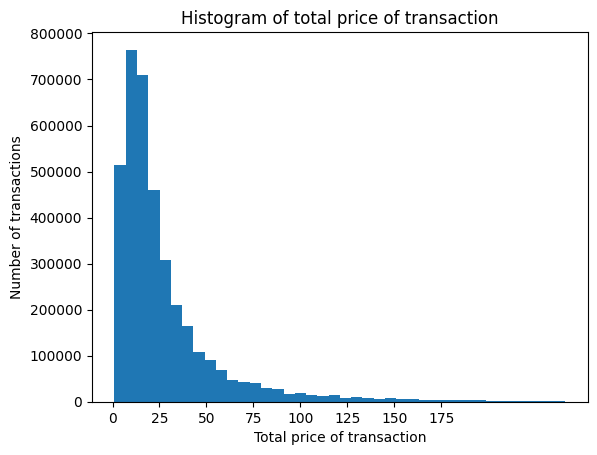

In [110]:
# sort values by total price
df_grouped = df_grouped[df_grouped['total_price'] > 1]
df_grouped = df_grouped[df_grouped['total_price']
                        < mean_total_price + 5 * std_total_price]

df_grouped = df_grouped.sort_values(by=['total_price'])

# create histogram of total price of transaction
plt.hist(df_grouped['total_price'], bins=40)
plt.xticks(np.arange(0, 200, 25))

# add title and labels
plt.title("Histogram of total price of transaction")
plt.xlabel("Total price of transaction")
plt.ylabel("Number of transactions")
# show plot
plt.show()


# Number of transaction during year and day / price spend during year and day

In [111]:
# change the type of sales_datetime to datetime
df['sales_datetime'] = pd.to_datetime(df['sales_datetime'])
# sort by sales_datetime
df = df.sort_values(by=['sales_datetime'])

# add columns day, month, year, weekday
df['day'] = df['sales_datetime'].dt.day
df['month'] = df['sales_datetime'].dt.month
df['year'] = df['sales_datetime'].dt.year
df['weekday'] = df['sales_datetime'].dt.weekday
df['hour'] = df['sales_datetime'].dt.hour

In [112]:
# group by day year and month and calculate number of unique transactions per day
df_grouped_by_date = df.groupby(['year', 'month', 'day', 'weekday'])[
    'transaction_id'].nunique().reset_index(name='number_of_transactions')

In [131]:
average_transactions_per_day = df_grouped_by_date['number_of_transactions'].mean()
print(average_transactions_per_day)
days_count = df_grouped_by_date.shape[0]


2773.553597650514


# calculate average number of transactions for each day of the week

   weekday  average_transactions
0        0           2647.000000
1        1           2698.622449
2        2           2903.041026
3        3           3028.979487
4        4           3493.030769
5        5           3598.326425
6        6           1028.520833


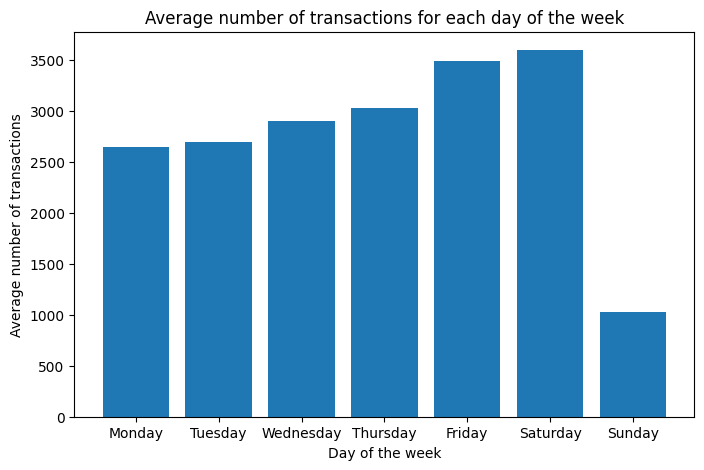

In [114]:
# calculate average number of transactions for each day of the week
average_transactions_by_weekday = df_grouped_by_date.groupby('weekday')[
    'number_of_transactions'].mean().reset_index(name='average_transactions')
print(average_transactions_by_weekday)

# make it a bit bigger
plt.figure(figsize=(8, 5))

# create histogram of average number of transactions for each day of the week
plt.bar(average_transactions_by_weekday['weekday'],
        average_transactions_by_weekday['average_transactions'])

# change x axis ticks
plt.xticks(np.arange(0, 7, 1), ('Monday', 'Tuesday', 'Wednesday',
                                'Thursday', 'Friday', 'Saturday', 'Sunday'))

# add title and labels
plt.title("Average number of transactions for each day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Average number of transactions")
# show plot
plt.show()

# calculate average number of transactions for each month

    month  average_transactions
0       1           2572.983871
1       2           2419.212389
2       3           2619.943089
3       4           2232.116667
4       5           2528.631148
5       6           2832.358974
6       7           2687.903226
7       8           2389.766129
8       9           2313.100000
9      10           2736.712766
10     11           2908.300000
11     12           5812.879121


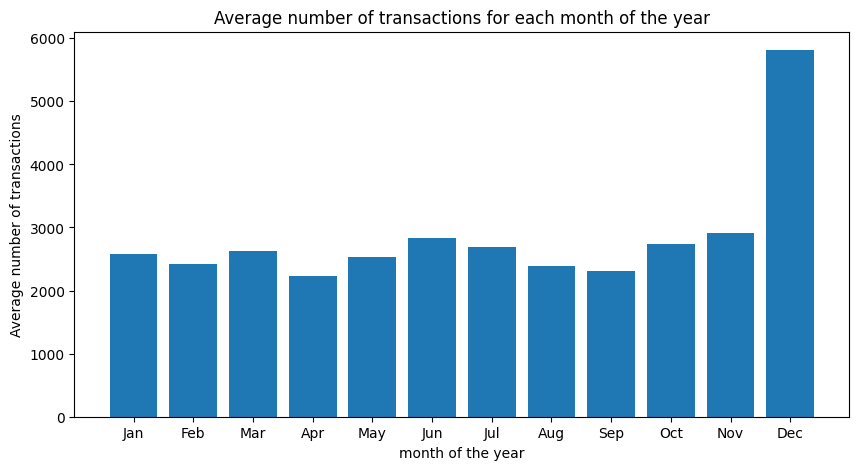

In [117]:
# calculate average number of transactions for each month
average_transactions_by_month = df_grouped_by_date.groupby('month')[
    'number_of_transactions'].mean().reset_index(name='average_transactions')
print(average_transactions_by_month)

plt.figure(figsize=(10, 5))

# create histogram of average number of transactions for each month
plt.bar(average_transactions_by_month['month'],
        average_transactions_by_month['average_transactions'])

plt.xticks(np.arange(1, 13, 1), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                                 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

# add title and labels
plt.title("Average number of transactions for each month of the year")
plt.xlabel("month of the year")
plt.ylabel("Average number of transactions")
# show plot
plt.show()


# TOP 10 averages transactions not in december

In [120]:
average_transactions_by_day = df_grouped_by_date.groupby(['month', 'day'])[
    'number_of_transactions'].mean().reset_index(name='average_transactions')

# sort by average transactions
average_transactions_by_day = average_transactions_by_day.sort_values(
    by=['average_transactions'], ascending=False)

average_transactions_by_day = average_transactions_by_day[average_transactions_by_day['month'] != 12]


# print top 10 days with the highest average number of transactions
print(average_transactions_by_day.head(10))


     month  day  average_transactions
334     11   30           6004.000000
178      6   27           4170.250000
179      6   28           4102.250000
89       3   30           4025.666667
333     11   29           4011.333333
2        1    3           3866.500000
327     11   23           3857.000000
320     11   16           3837.000000
131      5   11           3703.000000
59       2   29           3677.000000


# December analysis

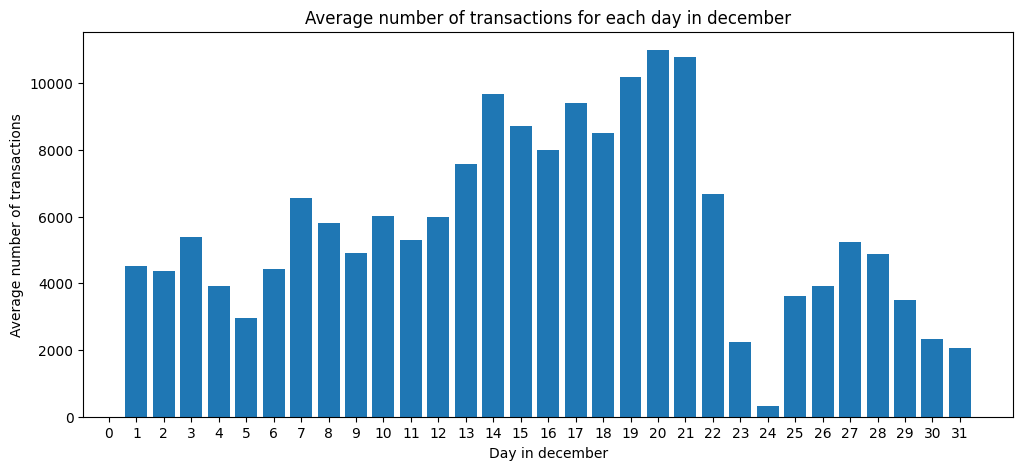

In [121]:
# calculate average number of transactions for each day in december (month 12)
average_transactions_by_day = df_grouped_by_date[df_grouped_by_date['month'] == 12].groupby('day')[
    'number_of_transactions'].mean().reset_index(name='average_transactions')

plt.figure(figsize=(12, 5))

# create histogram of average number of transactions for each day in december
plt.bar(average_transactions_by_day['day'],
        average_transactions_by_day['average_transactions'])

# change x axis ticks - create 32 ticks
plt.xticks(np.arange(0, 32, 1))

# add title and labels
plt.title("Average number of transactions for each day in december")
plt.xlabel("Day in december")
plt.ylabel("Average number of transactions")
# show plot
plt.show()

# calculate average number of transactions for each hour

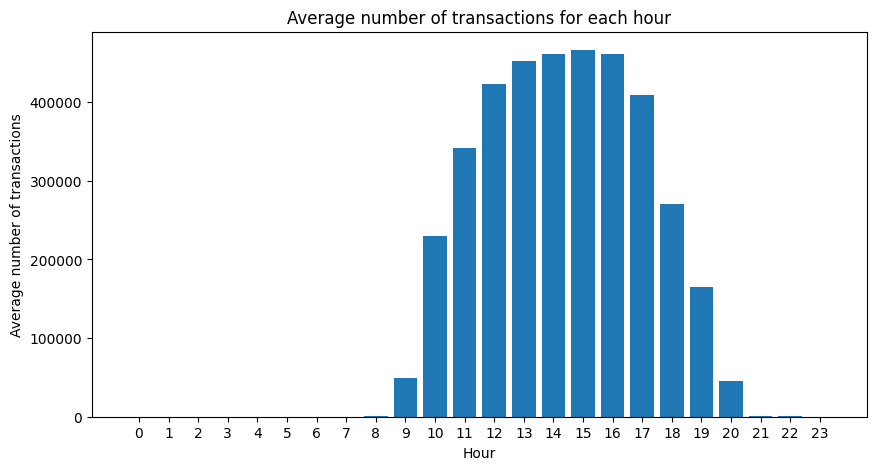

In [123]:
# calculate average number of transactions for each hour
df_grouped_hour = df.groupby(['hour'])[
    'transaction_id'].nunique().reset_index(name='number_of_transactions')

plt.figure(figsize=(10, 5))

# create histogram of average number of transactions for each hour
plt.bar(df_grouped_hour['hour'],
        df_grouped_hour['number_of_transactions'])

# change x axis ticks - create 24 ticks
plt.xticks(np.arange(0, 24, 1))

# add title and labels
plt.title("Average number of transactions for each hour")
plt.xlabel("Hour")
plt.ylabel("Average number of transactions")
# show plot
plt.show()

# Split data into smaller pieces by category_id

In [132]:
categories = df['category_id'].unique()

# remove categories with less than 15 different product_ids
# remove also categories that appear in less than 20 transactions in a day
for category in categories:
    if len(df[df['category_id'] == category]['product_id'].unique()) < 15:
        categories = np.delete(categories, np.where(categories == category))
        continue
    if len(df[df['category_id'] == category]['transaction_id'].unique()) < 20 * days_count:
        categories = np.delete(categories, np.where(categories == category))

print("Number of different categories is", len(categories))

Number of different categories is 57


# Create neccessary functions

In [154]:
def create_associations_rules(itemsets):
    my_association_rules = association_rules(
        itemsets, metric="lift", min_threshold=1)

    #print(my_association_rules)
    my_association_rules = my_association_rules[
        (my_association_rules['confidence'] >= 0.05) & (my_association_rules['support'] > 0.01)]
    
    if len(my_association_rules) > 0:
        print("maximum support is", max(my_association_rules['support']))
        print("there are " +
            str(my_association_rules.shape[0]) + " association rules with lift at least 1 and support > 0.01")
        print(my_association_rules)


def analise_sparse_basket(basket):
    min_support = days_count / transactions_count
    print("min support is", min_support)

    # use fp-growth to find frequent itemsets
    my_frequent_itemsets = fpgrowth(basket, min_support=min_support)

    print("there are " +
          str(my_frequent_itemsets.shape[0]) + " itemsets that appear in at least 1 transactions of this category a day")

    if len(my_frequent_itemsets) > 0:
        create_associations_rules(my_frequent_itemsets)


def analise_dataset(dataset):
    # use groupby to group the data by transaction_id and make a list of product_ids
    df_grouped = dataset.groupby('transaction_id')['product_id'].apply(list)
    dataset = df_grouped.tolist()

    # use TransactionEncoder to make a sparse matrix
    te = TransactionEncoder()
    fitted = te.fit(dataset)
    te_ary = fitted.transform(dataset, sparse=True)
    my_basket = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)

    analise_sparse_basket(my_basket)


In [155]:
interesting_categories = [208, 179, 175, 220, 170, 233, 250, 255, 266, 263]
# interesting categories where chosen by using loop below on categories. Interesting ones are those, that
# had more than 0 assosiaction rules.

for category in interesting_categories:
    dataset = df[df['category_id'] == category]
    print("Analysing category:", dataset['category_id'].unique()[0])
    transactions_count = len(dataset['transaction_id'].unique())
    print("Number of transactions in this category is", transactions_count)
    print("Number of different products in this category is",
        len(dataset['product_id'].unique()))
    analise_dataset(dataset)
    print('\n')


Analysing category: 208
Number of transactions in this category is 86959
Number of different products in this category is 24
min support is 0.015662553617221908
there are 17 itemsets that appear in at least 5 % transactions of this category
maximum support is 0.023746823215538358
there are 2 association rules with lift at least 1 and support > 0.01
  antecedents consequents  antecedent support  consequent support   support  \
0        (13)         (5)            0.210927            0.103589  0.023747   
1         (5)        (13)            0.103589            0.210927  0.023747   

   confidence      lift  leverage  conviction  
0    0.112583  1.086825  0.001897    1.010135  
1    0.229241  1.086825  0.001897    1.023761  


Analysing category: 179
Number of transactions in this category is 135255
Number of different products in this category is 140
min support is 0.010069868027059998
there are 54 itemsets that appear in at least 5 % transactions of this category
maximum support is 0.0

In [148]:
category_pairs = []
for i in range(len(interesting_categories)):
    for j in range(i + 1, len(interesting_categories)):
        category_pairs.append((interesting_categories[i], interesting_categories[j]))
print("Number of different category pairs is", len(category_pairs))

Number of different category pairs is 45


In [149]:
for category_pair in category_pairs:
    dataset = df[(df['category_id'] == category_pair[0]) | (df['category_id'] == category_pair[1])]
    transactions_count = len(dataset['transaction_id'].unique())
    print("Analysing category pair:", category_pair[0], category_pair[1])
    print("Number of transactions in this pair is", transactions_count)
    print("Number of different products in this pair is",
        len(dataset['product_id'].unique()))
    analise_dataset(dataset)
    print('\n')

Analysing category pair: 208 179
Number of transactions in this category is 217790
Number of different products in this category is 164
min support is 0.006253730657973277
there are 71 itemsets that appear in at least 5 % transactions of this category
there are 18 association rules with lift at least 1
maximum support is 0.021607970981220442


Analysing category pair: 208 175
Number of transactions in this category is 202423
Number of different products in this category is 67
min support is 0.006728484411356417
there are 40 itemsets that appear in at least 5 % transactions of this category
there are 6 association rules with lift at least 1
maximum support is 0.010201409918833334


Analysing category pair: 208 220
Number of transactions in this category is 684748
Number of different products in this category is 320
min support is 0.001989052907054858
there are 194 itemsets that appear in at least 5 % transactions of this category
there are 22 association rules with lift at least 1
maxim

Analysing category pair: 220 170
Number of transactions in this category is 650084
Number of different products in this category is 311
min support is 0.0020951138622085762
there are 186 itemsets that appear in at least 5 % transactions of this category
there are 22 association rules with lift at least 1
maximum support is 0.005054731388559017


Analysing category pair: 220 233
Number of transactions in this category is 652135
Number of different products in this category is 354
min support is 0.0020885246153020463
there are 191 itemsets that appear in at least 5 % transactions of this category
there are 18 association rules with lift at least 1
maximum support is 0.005038833983761031


Analysing category pair: 220 250
Number of transactions in this category is 823826
Number of different products in this category is 465
min support is 0.0016532617324532123
there are 221 itemsets that appear in at least 5 % transactions of this category
there are 18 association rules with lift at least 

KeyboardInterrupt: 